In [15]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = "L5_data"

# Filepath
fp = os.path.join(data_dir, "Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")

# Open the file:
raster = rasterio.open(fp)

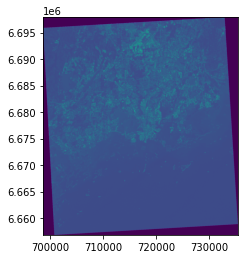

In [3]:
show((raster, 1))

Text(0.5, 1.0, 'Blue')

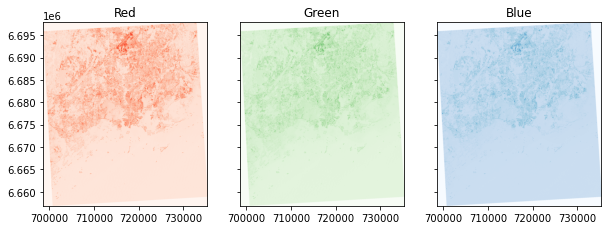

In [13]:
# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 3), cmap='Reds', ax=ax1)
show((raster, 2), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

# RGB True color composite

In [7]:
# Read the grid values into numpy arrays
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print('red: ', redn.min(), '-', redn.max(), 'mean:', redn.mean())
print('green: ', greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print('blue: ', bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
red:  0.0 - 1.0 mean: 0.1423301480606746
green:  0.0 - 1.0 mean: 0.16915069862129217
blue:  0.0 - 1.0 mean: 0.23384832284425988


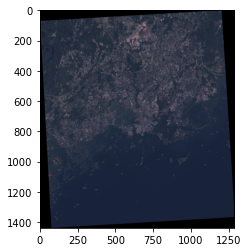

In [12]:
# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb);

# False color composite

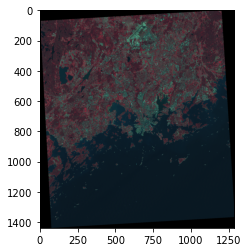

In [14]:
# Read the grid values into numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize the values using the function that we defined earlier
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

# Create the composite by stacking
nrg = np.dstack((nirn, redn, greenn))

# Let's see how our color composite looks like
plt.imshow(nrg)

# Histogram of the raster data

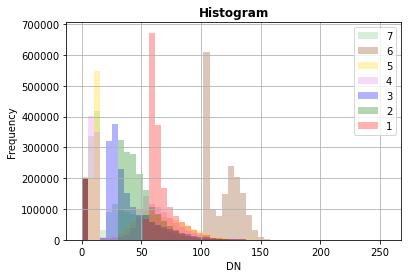

In [16]:
show_hist(
    raster, 
    bins=50,
    lw=0.0, 
    stacked=False,
    alpha=0.3,
    histtype='stepfilled', 
    title="Histogram"
)